In [1]:
import pandas as pd
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
################### reading files ####################
my_example_nc_file = 'EUREC4A_HALO_BAHAMAS-Radiometer_20200211a.nc'
fh = Dataset(my_example_nc_file, mode='r')
df_fdir = pd.read_csv('BBR_DirectFraction_Flight_20200211a_R0.dat',skiprows = 34,delim_whitespace=True)
df_fdw = pd.read_csv('BBR_Fdn_clear_sky_Flight_20200211a_R0.dat',skiprows = 34, delim_whitespace=True)
#nav = pd.read_csv('Nav_IMS0000_02022020.Asc',skiprows=14, header=None,delim_whitespace=True)
fdw_time = df_fdw.loc[:,['sod','F_dw']]
fdir_time = df_fdir.loc[:,'f_dir']
db = pd.concat([fdw_time,fdir_time],axis=1)
db.set_index('sod',inplace=True)
time = fh.variables['TIME'][:] # time
time_bac = pd.DataFrame(time.T, columns = ['time'])
time_bac = time_bac/1000
db,time_bac

(             F_dw     f_dir
 sod                        
 43075  315.304016  0.736221
 43195  323.223083  0.739824
 43315  331.331787  0.743816
 43435  339.249695  0.747220
 43555  347.265015  0.750783
 ...           ...       ...
 77300   97.184074  0.709726
 77420   81.610321  0.583265
 77540   70.465683  0.499552
 77660   62.652531  0.475292
 77780   52.083931  0.399664
 
 [290 rows x 2 columns],            time
 0       44945.0
 1       44945.1
 2       44945.2
 3       44945.3
 4       44945.4
 ...         ...
 329045  77849.5
 329046  77849.6
 329047  77849.7
 329048  77849.8
 329049  77849.9
 
 [329050 rows x 1 columns])

In [7]:
array = np.arange(43075,77850, 1)
arr = array.repeat(10)
df_arr = pd.DataFrame(arr, columns = ['time_arr'])
df_arr.set_index('time_arr',inplace=True)
data = df_arr.join(db)
data_int= data.interpolate(method='linear', limit_direction='forward', axis=0)
data_int.reset_index(inplace=True)
data_int.drop(data_int.index[0:18700],inplace=True)
data_int
data_int.columns=['time','F_dw','f_dir']
data_int.reset_index(inplace=True,drop=True)
data_int
#data_int['time']=data_int.loc[:,'index']
#data_int[data_int['index']==44945]
#df_r = data_int.iloc[0:274510,:]
#df_r

,time,F_dw,f_dir
0,44945,450.090338,0.806422
1,44945,450.114599,0.806458
2,44945,450.138861,0.806493
3,44945,450.163122,0.806529
4,44945,450.187383,0.806564
...,...,...,...
329045,77849,52.083931,0.399664
329046,77849,52.083931,0.399664
329047,77849,52.083931,0.399664
329048,77849,52.083931,0.399664


In [8]:
fdw = data_int.loc[:,'F_dw']
fdir = data_int.loc[:,'f_dir']
szai = fh.variables['SUN_ALT'][:] # solar altitude angle
sza = pd.DataFrame(szai.T)
sza.columns=['SUN_ALT']
saai = fh.variables['SUN_AZI'][:] # solar azimuth angle
saa = pd.DataFrame(saai.T)
saa.columns=['SUN_AZI']
SWd = fh.variables['FDSC'][:]
SWD = pd.DataFrame(SWd.T)
SWD.columns=['shortwave_down']
SWu = fh.variables['FUS'][:]
LWu = fh.variables['FDL'][:]
LWd = fh.variables['FUL'][:]
SWU = pd.DataFrame(SWu.T)
SWU.columns=['ShortWave_up']
LWU = pd.DataFrame(LWu.T)
LWU.columns=['LongWave_down']
LWD = pd.DataFrame(LWd.T)
LWD.columns=['LongWave_up']
radiometer_nc= pd.concat([time_bac,SWD,SWU,LWU,LWD,saa,sza,fdw,fdir],axis=1)
d = radiometer_nc.loc[:,'time'].astype(str).str.split('.')
dec = []
for b,n in d:
    dec.append(b)
decend = pd.DataFrame(dec)
decend.columns=['Time']
df2=pd.concat([decend,radiometer_nc],axis=1)
df2.drop(['time'],axis=1,inplace=True)
df2

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir
0,44945,142.684753,6.871332,425.723846,461.228760,113.622055,28.055815,450.090338,0.806422
1,44945,143.325226,6.845238,426.372955,461.735077,113.622276,28.056244,450.114599,0.806458
2,44945,141.790939,6.508024,430.175049,461.952271,113.622498,28.056673,450.138861,0.806493
3,44945,142.728745,6.957798,419.656586,461.825714,113.622719,28.057102,450.163122,0.806529
4,44945,142.418304,7.057794,410.164978,461.494324,113.622940,28.057531,450.187383,0.806564
...,...,...,...,...,...,...,...,...,...
329045,77849,27.412460,-1.853905,414.847321,494.110413,-105.454468,5.683757,52.083931,0.399664
329046,77849,27.218136,-1.672411,408.217987,493.893341,-105.454353,5.683316,52.083931,0.399664
329047,77849,26.617531,-1.703953,401.199310,494.284454,-105.454239,5.682875,52.083931,0.399664
329048,77849,26.763311,-1.807268,413.343079,493.812531,-105.454117,5.682434,52.083931,0.399664


In [9]:
ri = fh.variables['IRS_PHI'][:] # roll angle "deg"
ro = pd.DataFrame(ri.T,columns=['roll'])
pi = fh.variables['IRS_THE'][:] # pitch angle "deg"
po = pd.DataFrame(pi.T,columns=['pitch'])
yi = fh.variables['IRS_HDG'][:] # yaw angle "deg"
y = pd.DataFrame(yi.T,columns=['yaw'])
df_big = pd.concat([df2,ro,po,y],axis=1)
df_big

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw
0,44945,142.684753,6.871332,425.723846,461.228760,113.622055,28.055815,450.090338,0.806422,0.847889,6.117234,76.530334
1,44945,143.325226,6.845238,426.372955,461.735077,113.622276,28.056244,450.114599,0.806458,0.888304,6.308983,76.462814
2,44945,141.790939,6.508024,430.175049,461.952271,113.622498,28.056673,450.138861,0.806493,0.934095,6.491604,76.396118
3,44945,142.728745,6.957798,419.656586,461.825714,113.622719,28.057102,450.163122,0.806529,0.951014,6.668324,76.332054
4,44945,142.418304,7.057794,410.164978,461.494324,113.622940,28.057531,450.187383,0.806564,0.887350,6.851446,76.260910
...,...,...,...,...,...,...,...,...,...,...,...,...
329045,77849,27.412460,-1.853905,414.847321,494.110413,-105.454468,5.683757,52.083931,0.399664,1.478762,1.773167,75.586174
329046,77849,27.218136,-1.672411,408.217987,493.893341,-105.454353,5.683316,52.083931,0.399664,1.210653,1.619123,75.594887
329047,77849,26.617531,-1.703953,401.199310,494.284454,-105.454239,5.682875,52.083931,0.399664,0.912642,1.417461,75.593613
329048,77849,26.763311,-1.807268,413.343079,493.812531,-105.454117,5.682434,52.083931,0.399664,0.674622,1.178342,75.585449


In [10]:
import math
r_off =  0.3
p_off =  -2.33
i1=[]
i2=[]
j1=[]
j2=[]
k1=[]
k2=[]
l1=[]
l2=[]

for i in df_big.SUN_ALT:
    i1.append(math.sin((90-i)*(math.pi/180)))
    i2.append(math.cos((90-i)*(math.pi/180)))
for k in df_big.roll:
    k=k+r_off
    k1.append(math.sin(k*(math.pi/180)))
    k2.append(math.cos(k*(math.pi/180)))
diff = df_big.SUN_AZI-df_big.yaw
for j in diff:
    j1.append(math.sin(j*(math.pi/180)))
    j2.append(math.cos(j*(math.pi/180)))
for l in df_big.pitch:
    l=l+p_off
    l1.append(math.sin(l*(math.pi/180)))
    l2.append(math.cos(l*(math.pi/180)))
       
eq1 = i1
eq2 = [i2[i]*k1[i]*j1[i] for i in range(len(i2))]
eq3 = [i2[i]*l1[i] for i in range(len(i2))]
eq4 = [k2[i]*j2[i] for i in range(len(k2))]
eq5 = [i1[i]*l2[i]*k2[i] for i in range(len(i1))]
factor = [eq1[i]/(eq2[i]+(eq3[i]*eq4[i])+eq5[i]) for i in range(len(eq1))]
x = df_big.F_dw
y = df_big.f_dir
Fdw = [y[i]*x[i]*factor[i]+(1-y[i])*x[i] for i in range(len(i1))]

swd_correct = pd.DataFrame(Fdw)
swd_correct.columns = ['shortwave_down_corrected']
df_big['shortwave_down_corrected']=swd_correct
df_bigg = df_big.groupby('Time').mean()
df_bigg.reset_index(inplace=True)
df_bigg.to_csv('df_bigg_11feb.csv')

In [14]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(77849) 

[21, 37, 29]

In [15]:
import datetime
start = datetime.datetime(2020, 2, 11, 12, 29, 5)
end = datetime.datetime(2020, 2, 11, 21, 37, 29)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_bigg['time']=df_time_delta
df_bigg

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw,shortwave_down_corrected,time
0,44945,142.459366,7.044844,420.082489,461.480194,113.623047,28.057747,450.199514,0.806582,0.735401,6.882782,76.227814,437.554175,2020-02-11 12:29:05
1,44946,142.303024,9.241298,417.436676,459.998535,113.625252,28.062044,450.442126,0.806936,-1.023727,8.113434,75.567497,438.872880,2020-02-11 12:29:06
2,44947,143.394348,12.646914,417.455536,457.838104,113.627464,28.066345,450.684738,0.807289,-3.047138,9.411907,75.029488,441.293644,2020-02-11 12:29:07
3,44948,143.078232,16.134922,417.778656,457.461060,113.629684,28.070648,450.927350,0.807643,-2.927229,10.748198,74.944267,439.078696,2020-02-11 12:29:08
4,44949,143.238571,17.591135,413.824738,455.739380,113.631905,28.074951,451.169962,0.807997,-0.973142,11.800306,75.279037,433.432390,2020-02-11 12:29:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32900,77845,26.673628,-0.352285,405.966553,485.455566,-105.459213,5.701684,52.083931,0.399664,-0.800244,1.681743,75.750801,52.064019,2020-02-11 21:37:25
32901,77846,26.945705,-0.749081,406.259064,487.771362,-105.458038,5.697250,52.083931,0.399664,-1.482429,1.984143,75.382713,52.077105,2020-02-11 21:37:26
32902,77847,27.229790,-1.407310,404.879120,489.550507,-105.456871,5.692820,52.083931,0.399664,-0.695996,2.539097,75.223412,52.092376,2020-02-11 21:37:27
32903,77848,27.223625,-1.346693,410.778839,491.190338,-105.455696,5.688395,52.083931,0.399664,0.142432,2.565812,75.337601,52.093925,2020-02-11 21:37:28


C:\Users\spark.DESKTOP-D1NJRMK\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


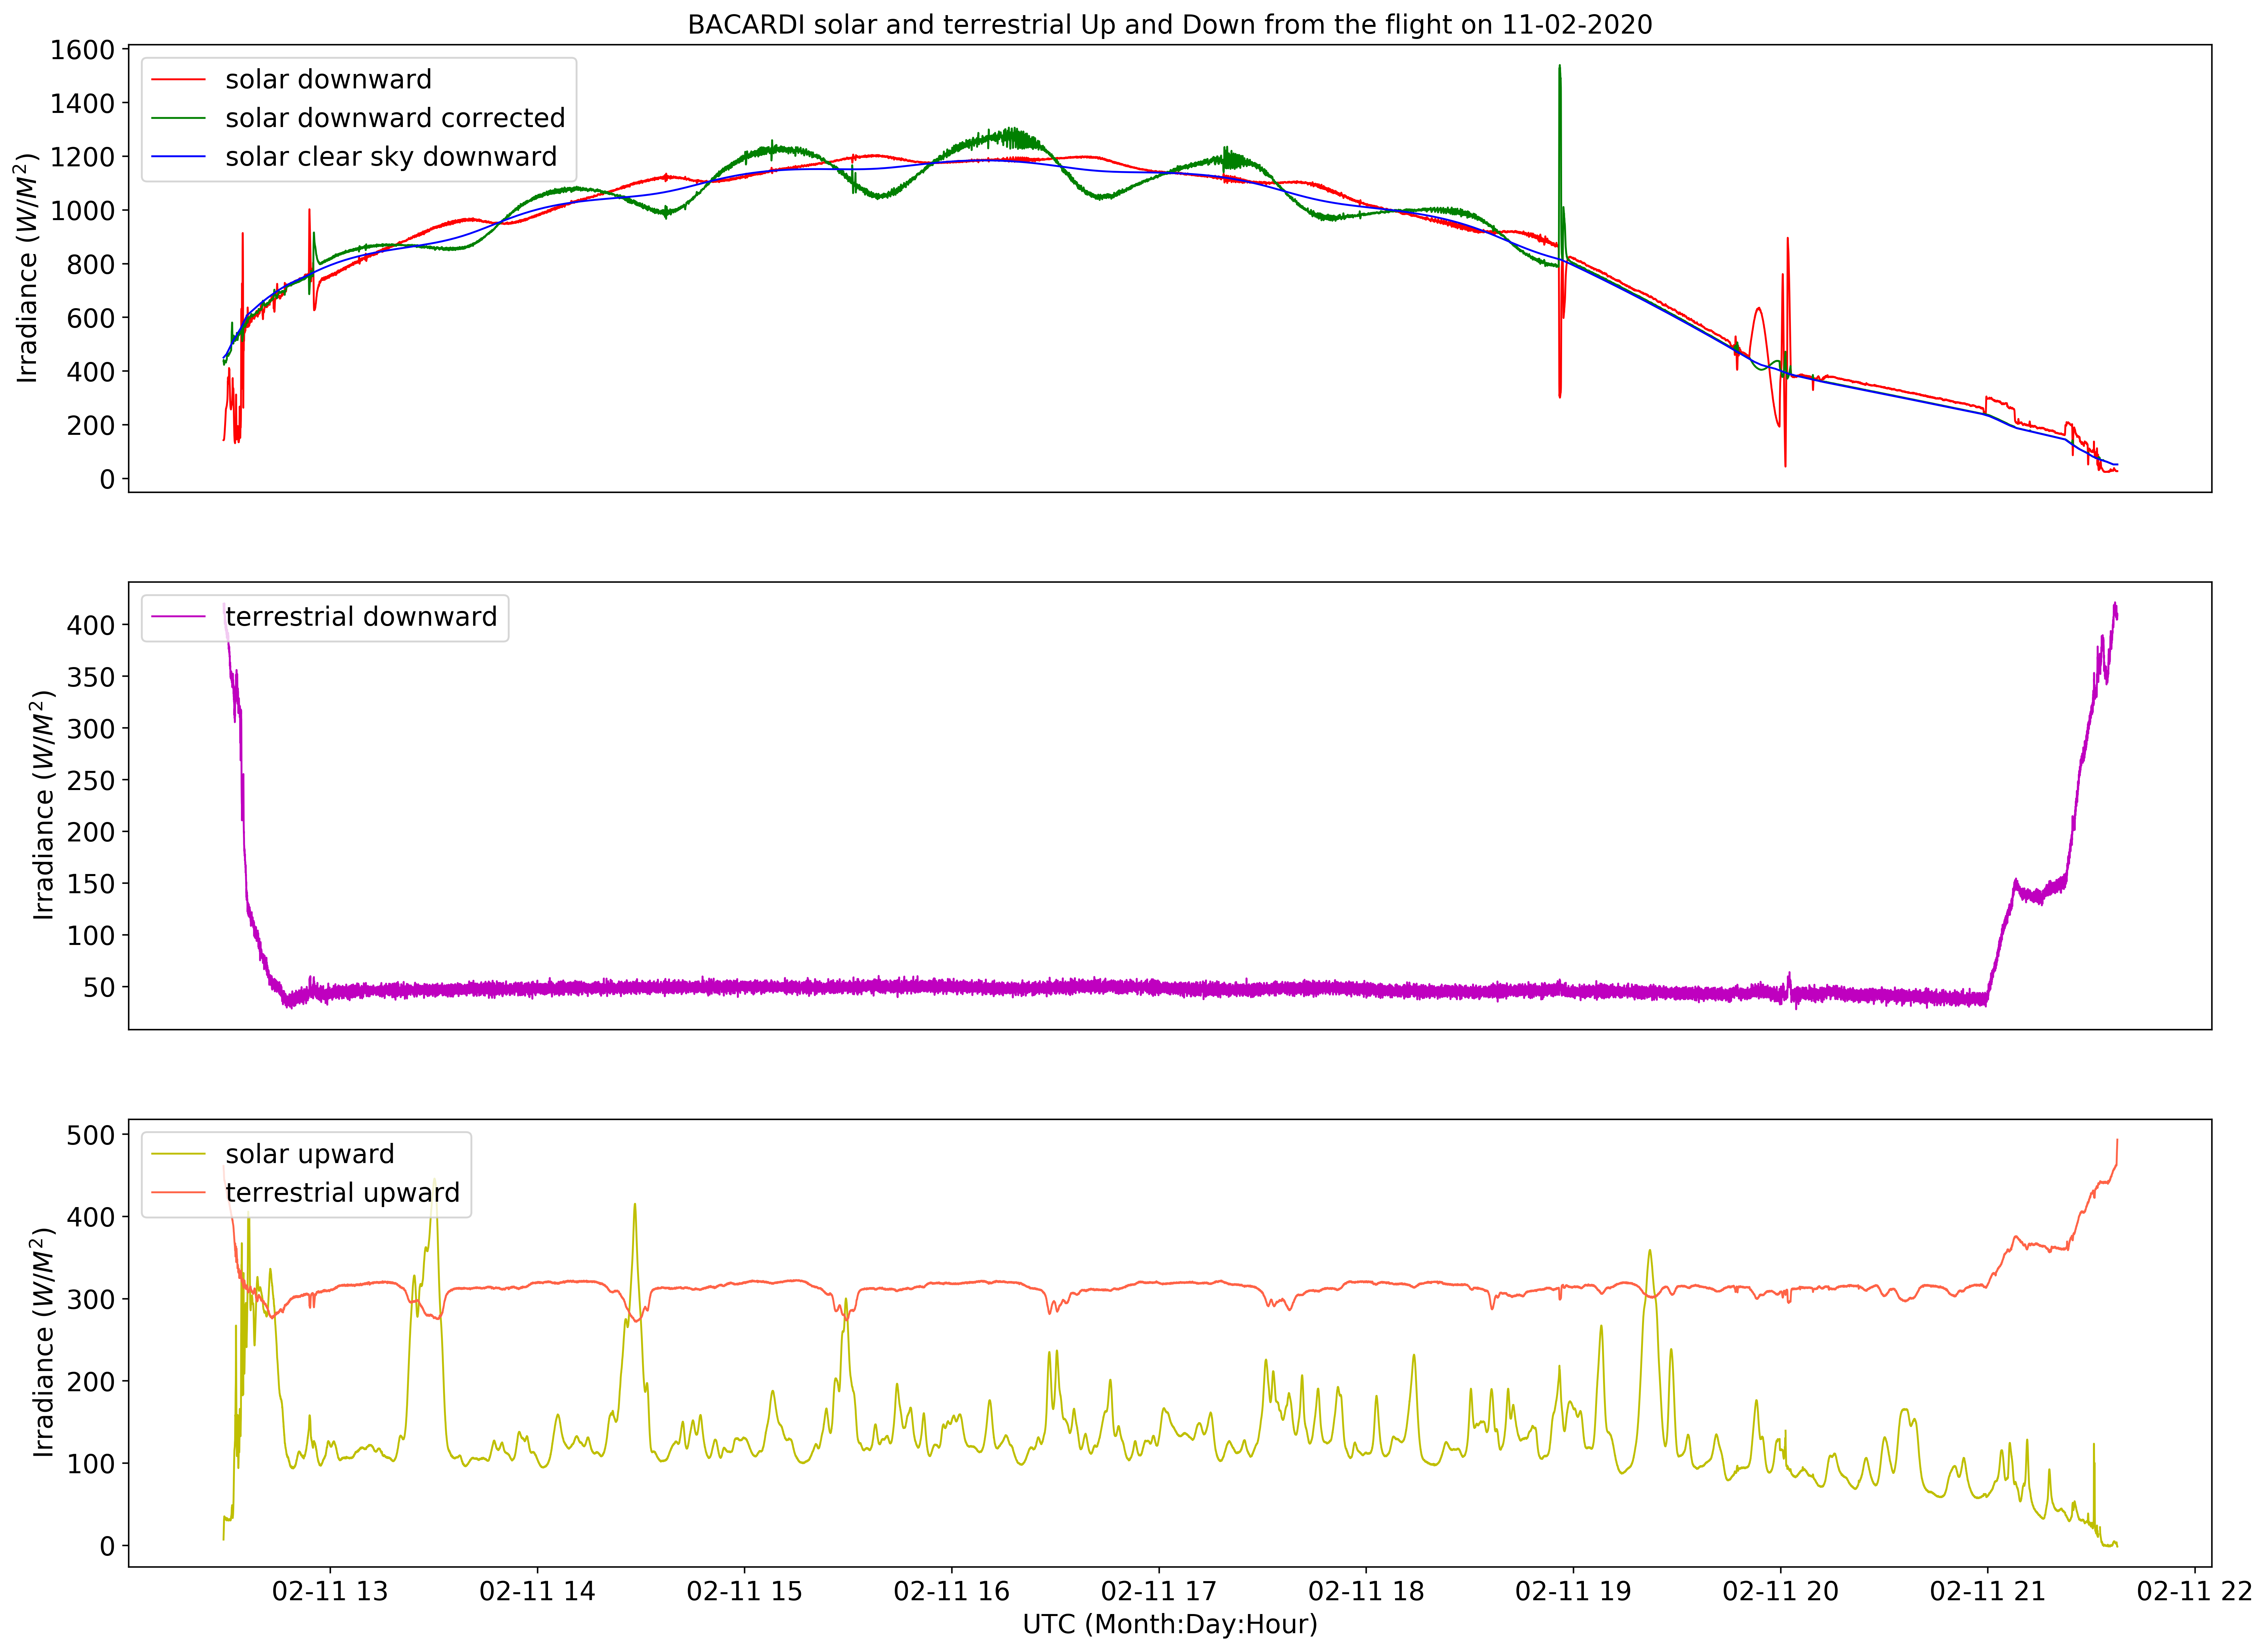

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(20,15),dpi=400)
plt.subplot(311)
plt.plot(df_bigg.time,df_bigg.shortwave_down, 'r', label = 'solar downward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.shortwave_down_corrected, 'g', label = 'solar downward corrected',linewidth=1)
plt.plot(df_bigg.time,df_bigg.F_dw, 'b', label = 'solar clear sky downward',linewidth=1)
plt.title('BACARDI solar and terrestrial Up and Down from the flight on 11-02-2020',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(312)
plt.plot(df_bigg.time,df_bigg.LongWave_down, 'm', label = 'terrestrial downward',linewidth=1)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(313)
plt.plot(df_bigg.time,df_bigg.ShortWave_up, 'y', label = 'solar upward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.LongWave_up, 'tomato', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC (Month:Day:Hour)',fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.show()